# Context : Data Exploration




Source : https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data


**Description**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

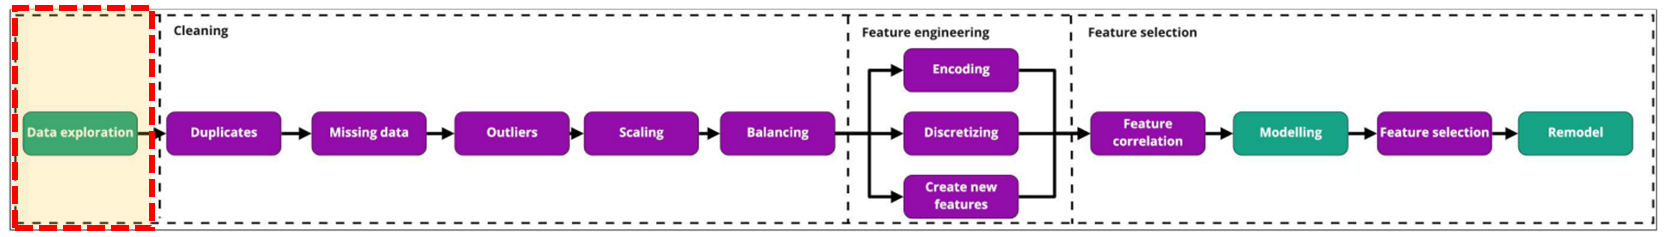


# Imports

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')
# pd.options.display.max_columns = None

import pandas as pd
import numpy as np
from scipy.stats import iqr

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Models
from sklearn.model_selection import train_test_split


# Retrieve data

## Get the raw data


In [2]:
#Retrieve data
path_to_data = '../data/raw_data/'
original_data = pd.read_csv(path_to_data + 'marketing_campaign.csv', sep=';')
original_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
# Copy of original data
data = original_data.copy()

data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## Drop initial columns


In [4]:
#List the columns that won't be used (exemple : Id, Name, ...)
cols_to_drop = ['ID']

data = data.drop(columns=cols_to_drop)
data.shape


(2240, 28)

# Explore data


## Generic data

In [5]:
# Shape
data.shape

(2240, 28)

In [6]:
# Columns
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
# Statistics
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count       2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean          27.062946  ...           5.316518      0.072768      0.074554   
std           41.280498  ...           2.426645      0.259813      0.262728   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            1.000000  ...           3.000000      0.000000      0.000000   
50%            8.000000  ...           6.000000      0.000000      0.000000   
75%           33.000000  ...           7.000000      0.000000      0.000000   
max          263.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 25 columns]

In [8]:
# Data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

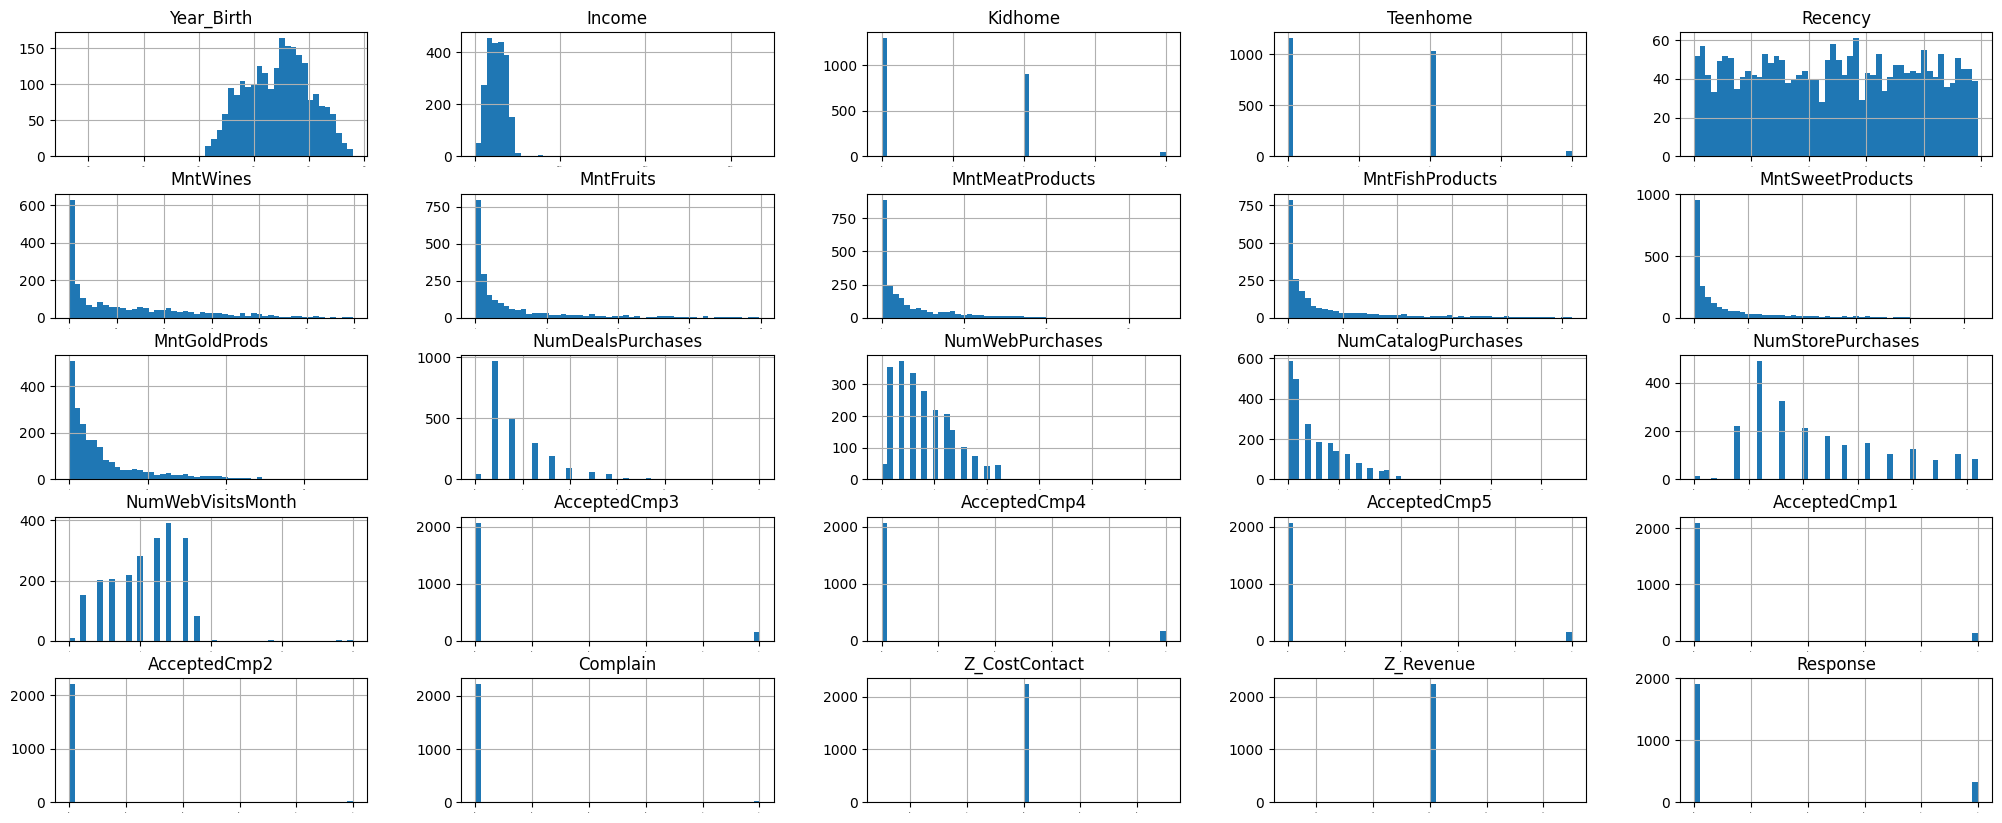

In [9]:
# Data histograms
data.hist(bins = 50, figsize = (25,10), xlabelsize=0)
plt.show()

## Drop columns with only one value


In [10]:
# Columns with only one value
columns_wth_one_value = []
for col in data.columns:
    if len(data[col].value_counts().index) < 2:
        columns_wth_one_value.append(col)
        
columns_wth_one_value

['Z_CostContact', 'Z_Revenue']

In [11]:
# Drop columns with only one value
data = data.drop(columns=columns_wth_one_value)
data.shape


(2240, 26)

## Visualization : Column histograms


<span style="font-family:Comic Sans MS; color:red">Input target name here : Response </span>




In [12]:
# Defining the target name
target_name = 'Response'

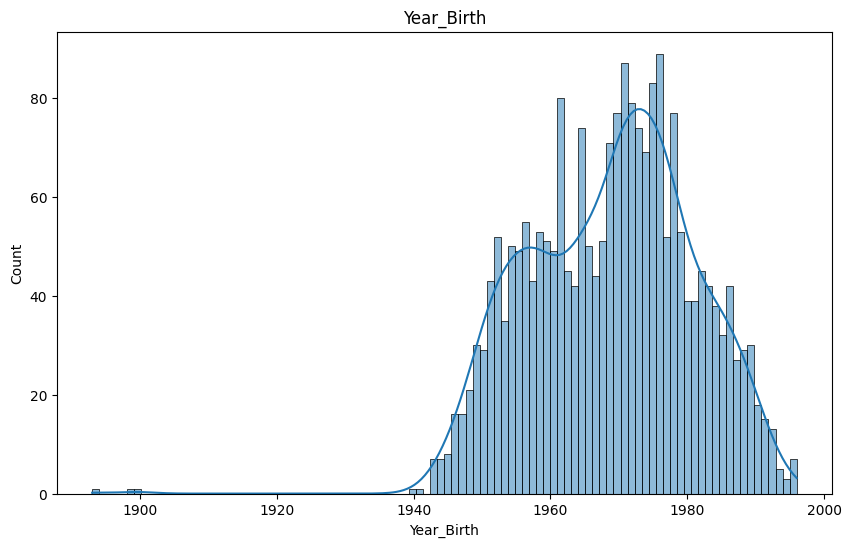

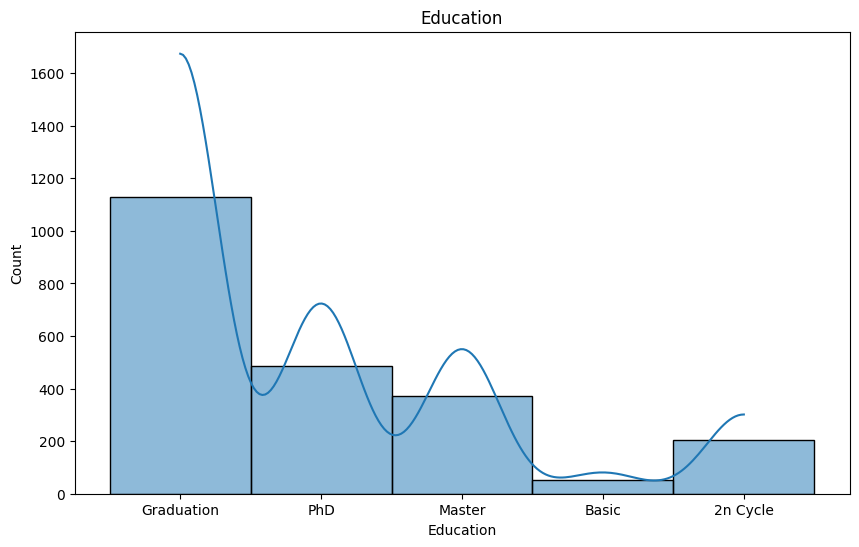

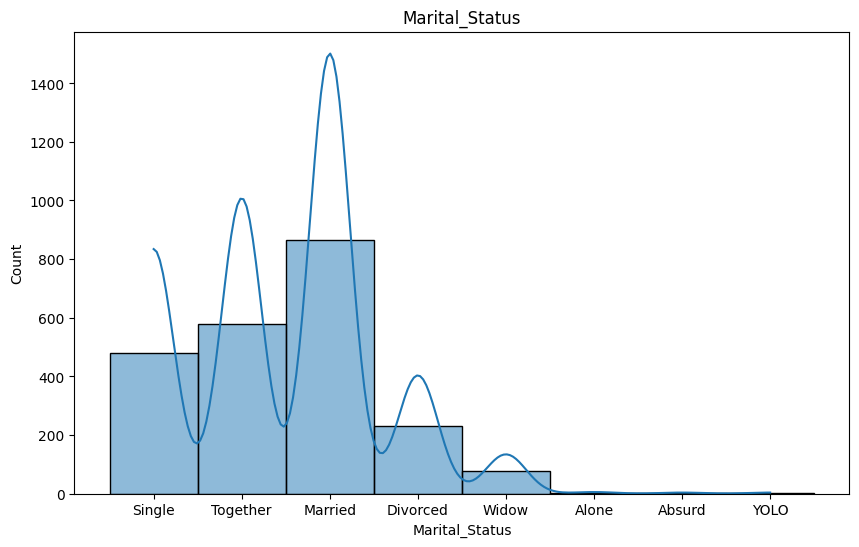

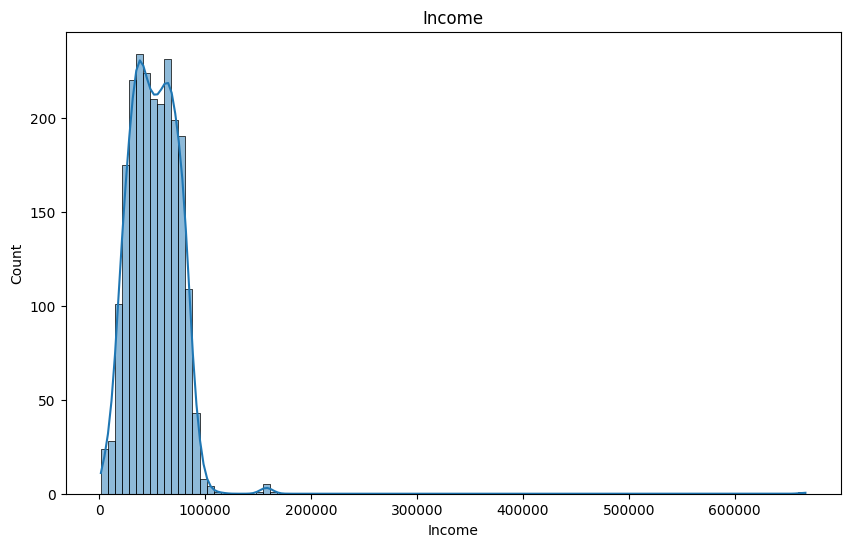

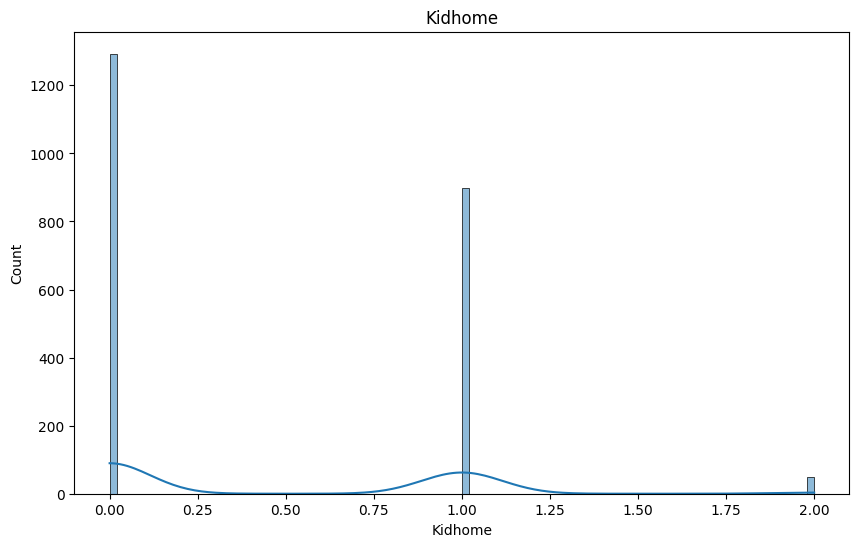

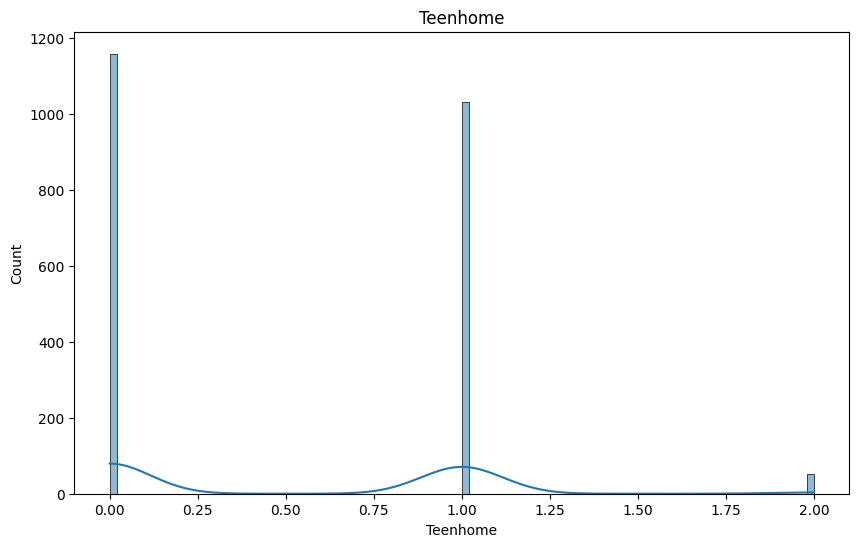

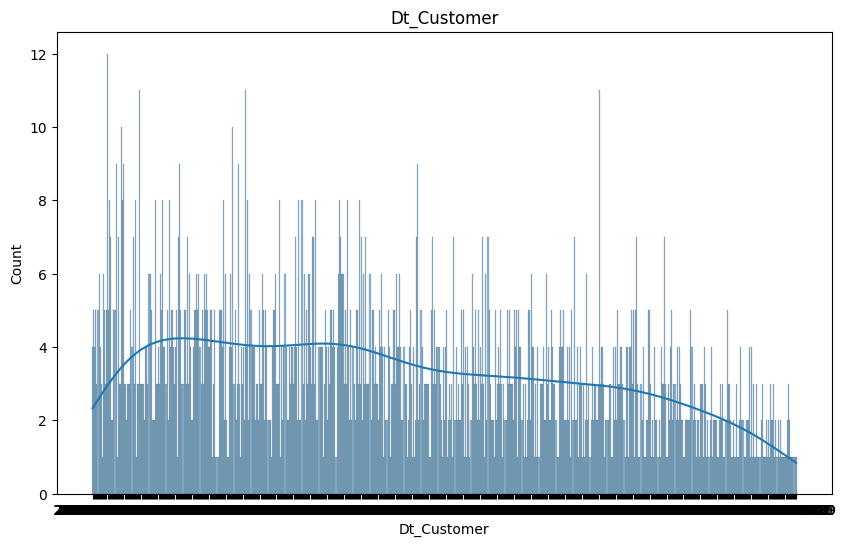

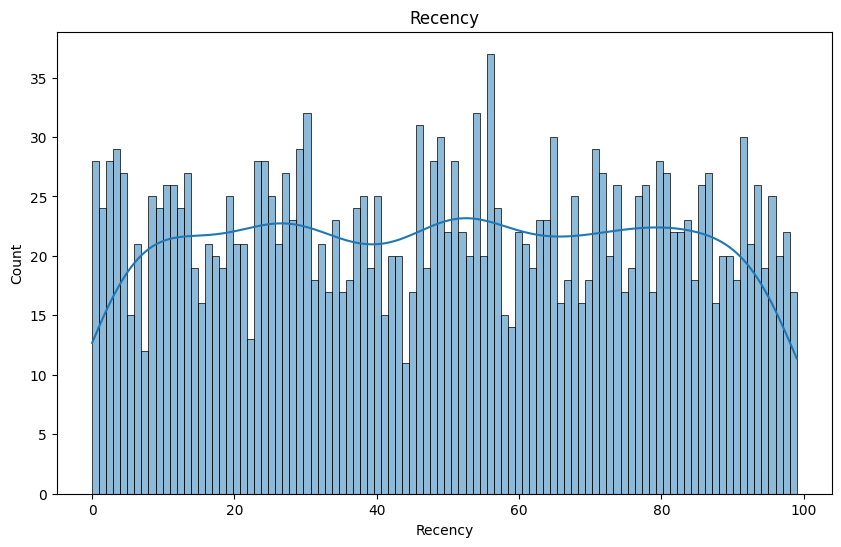

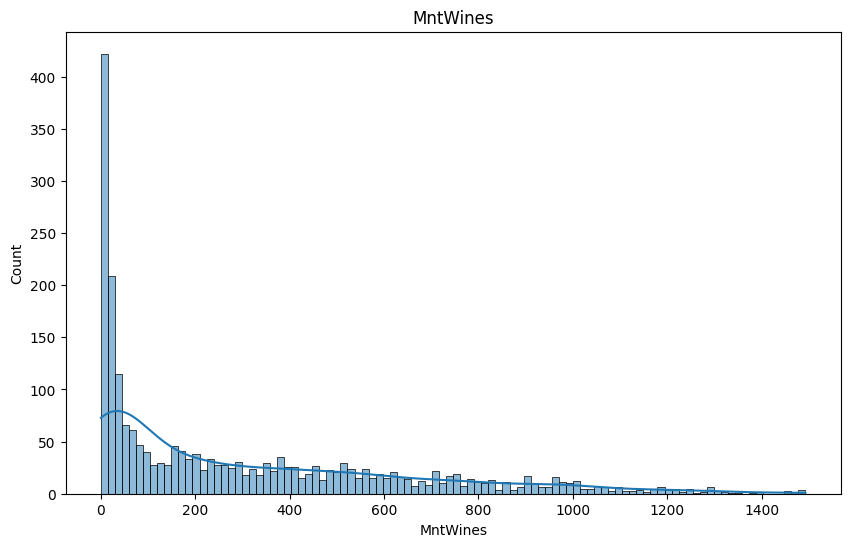

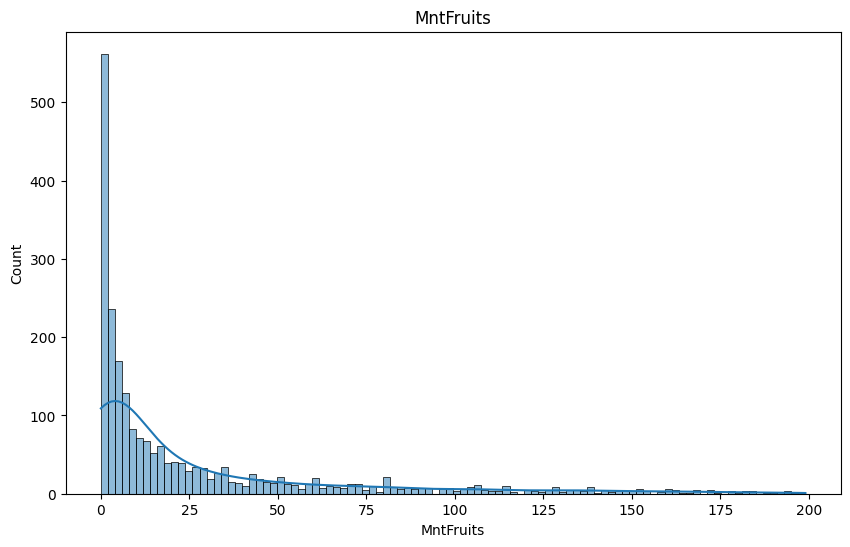

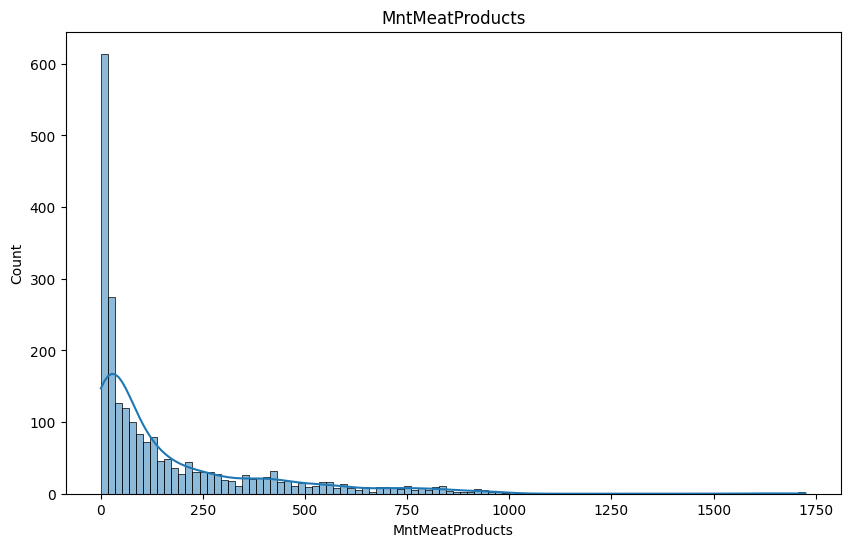

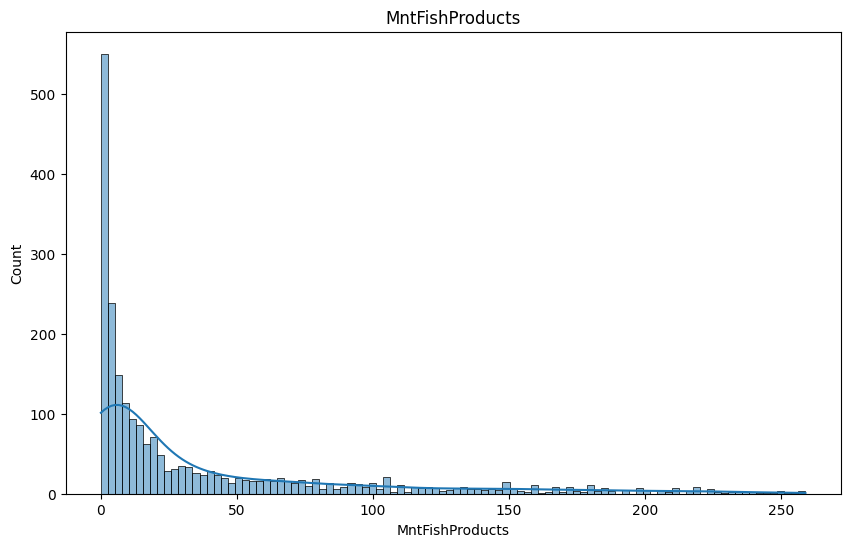

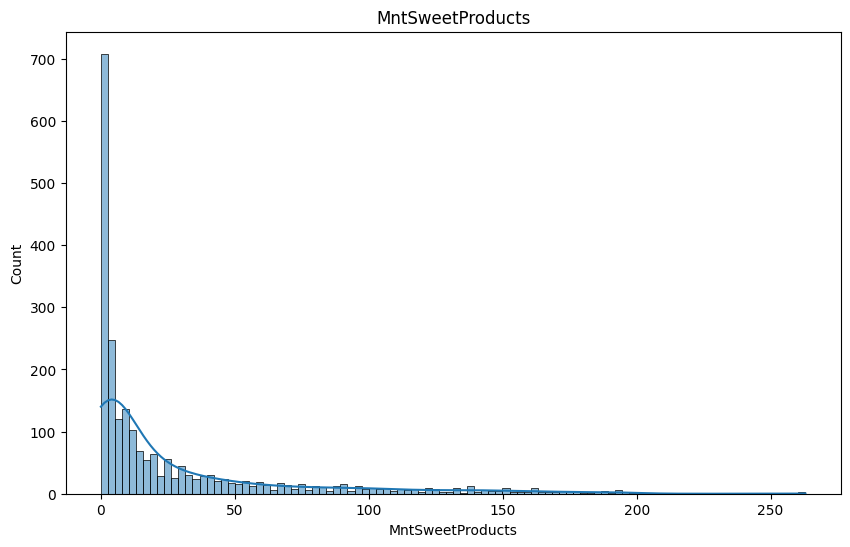

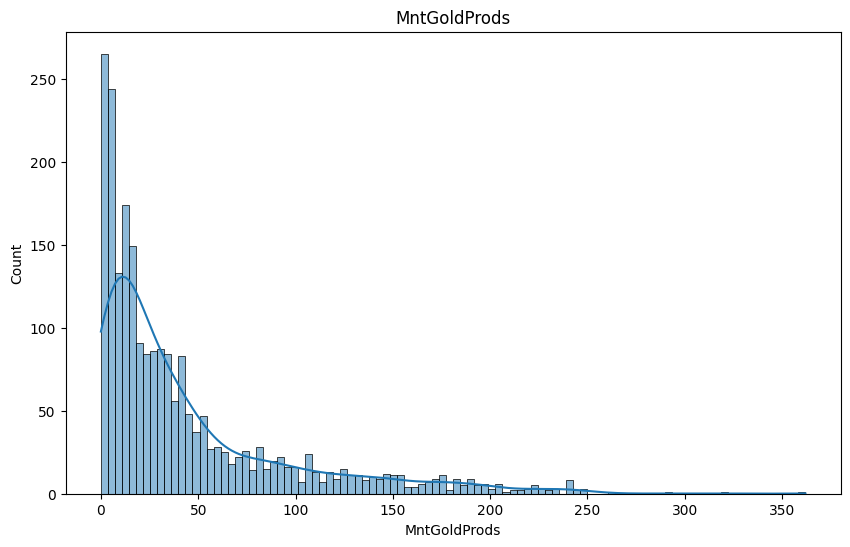

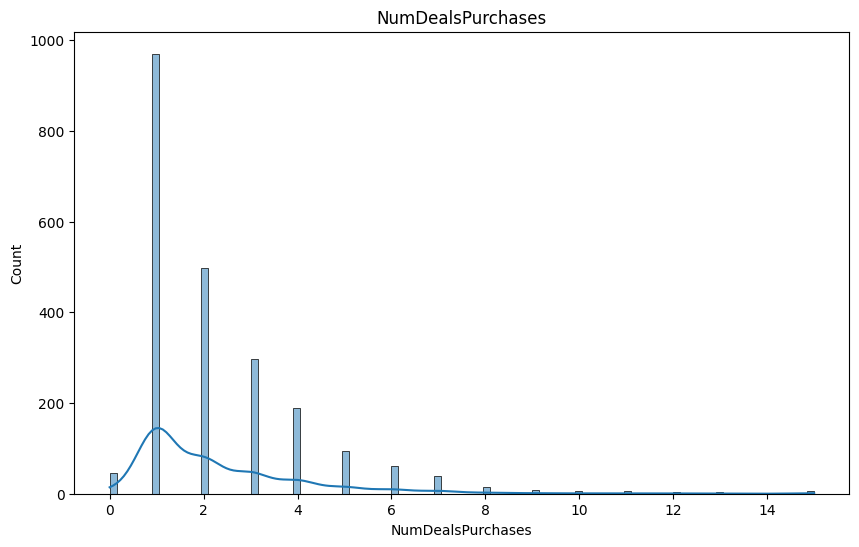

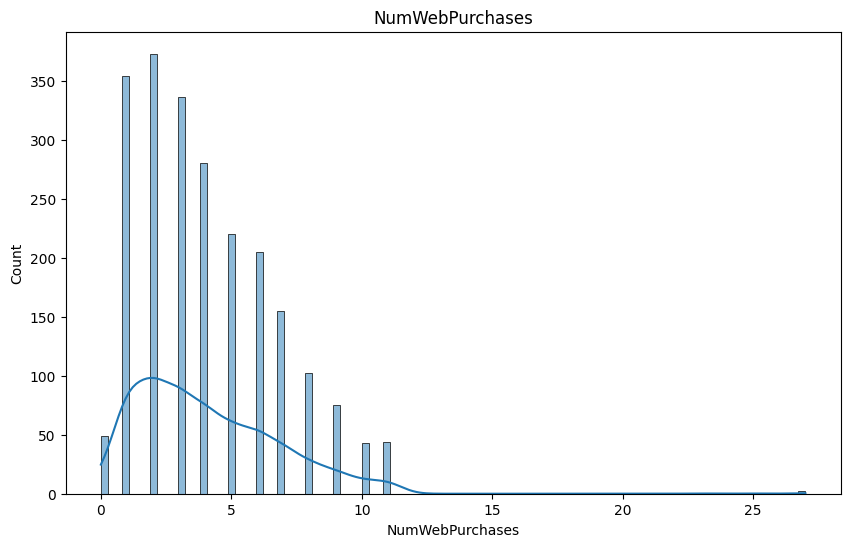

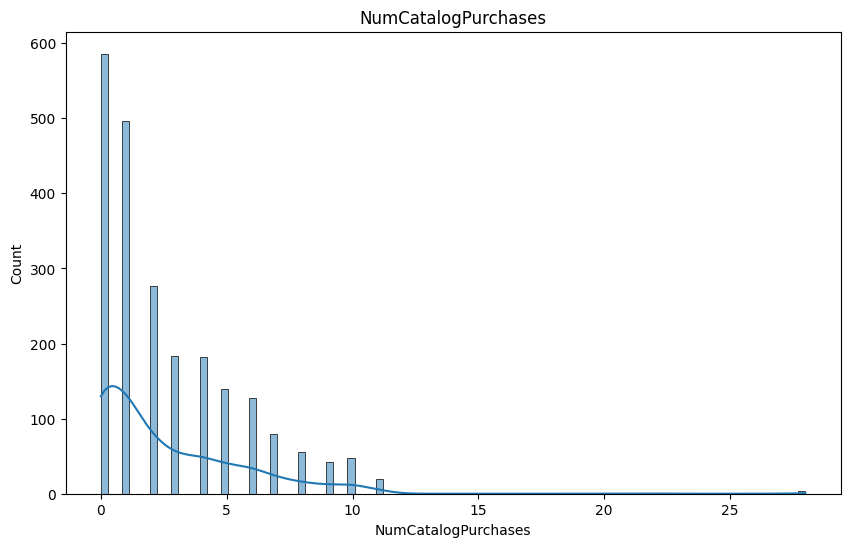

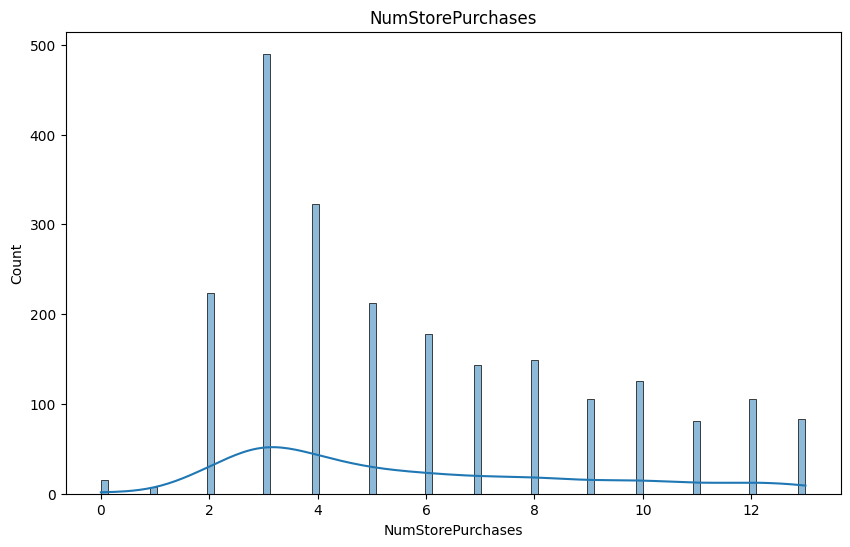

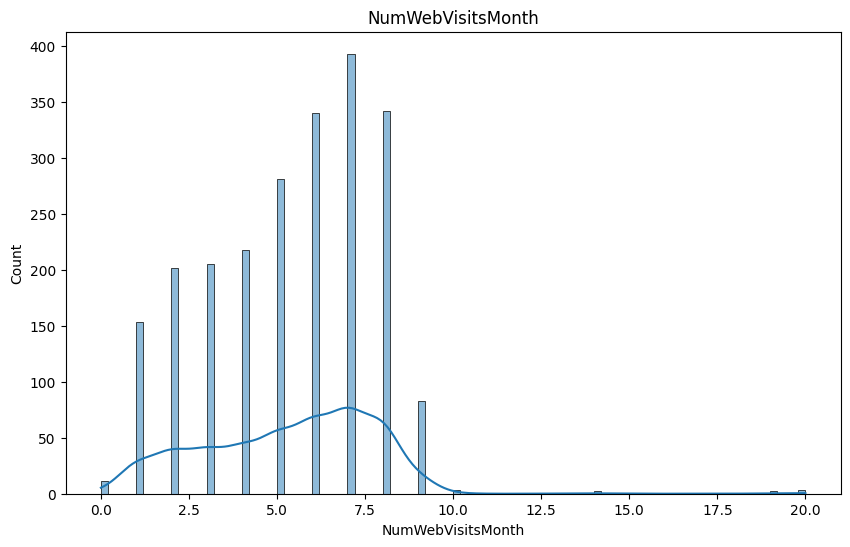

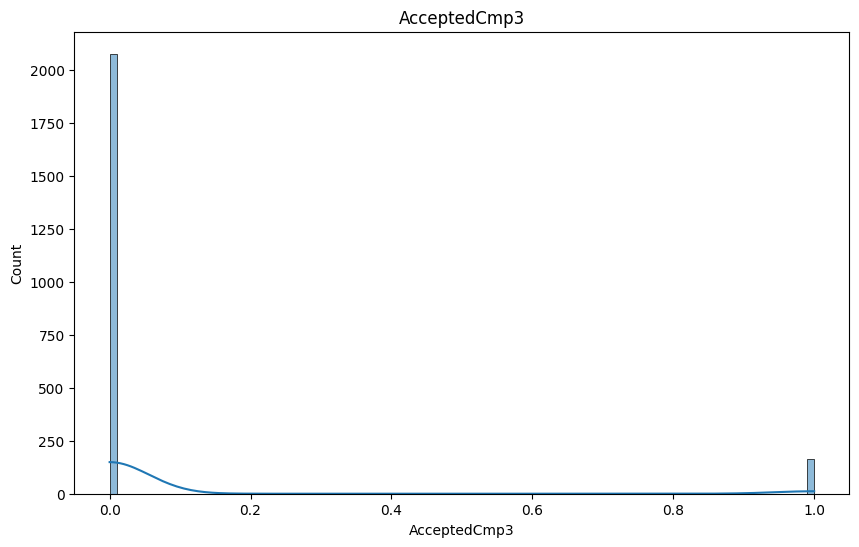

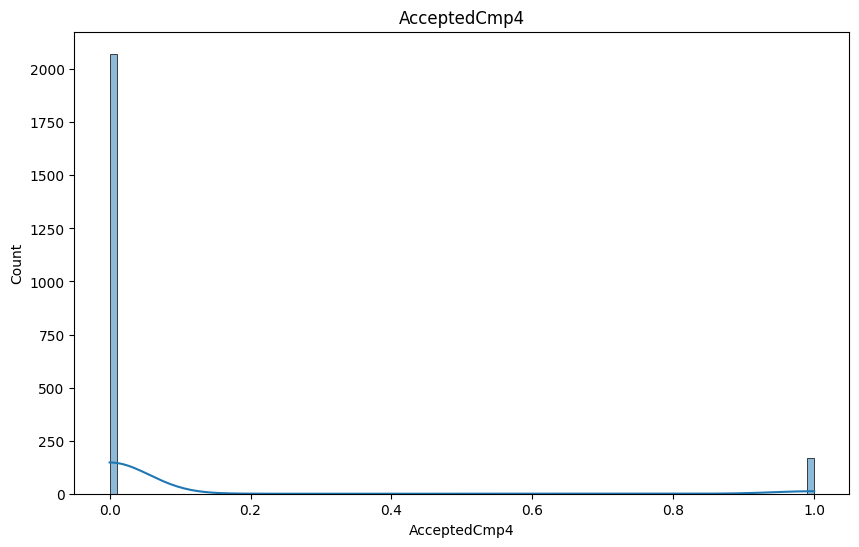

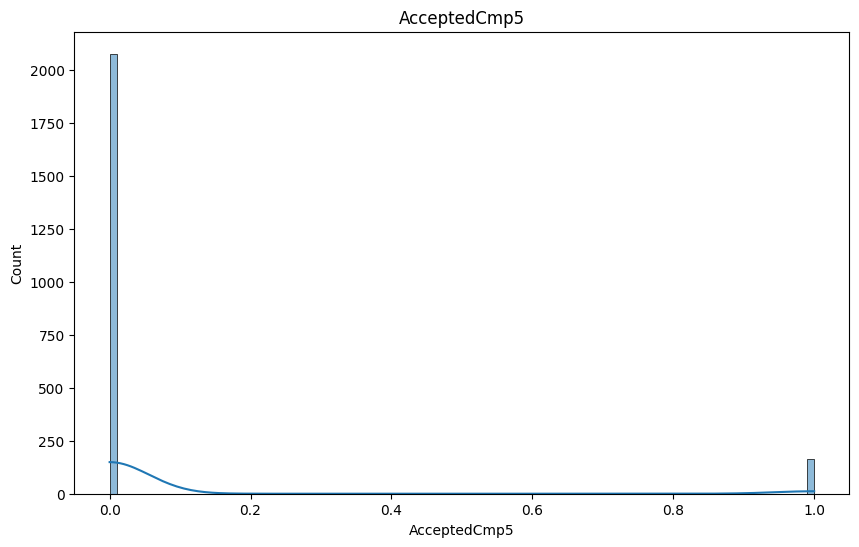

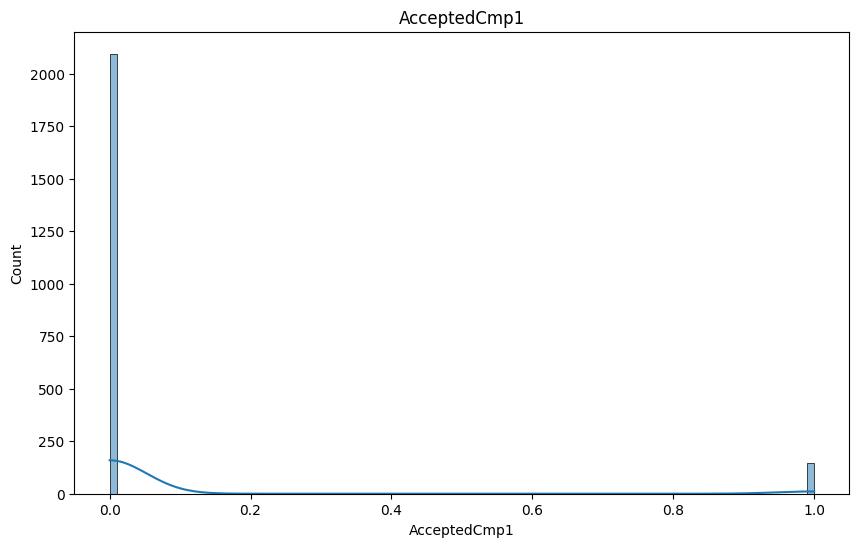

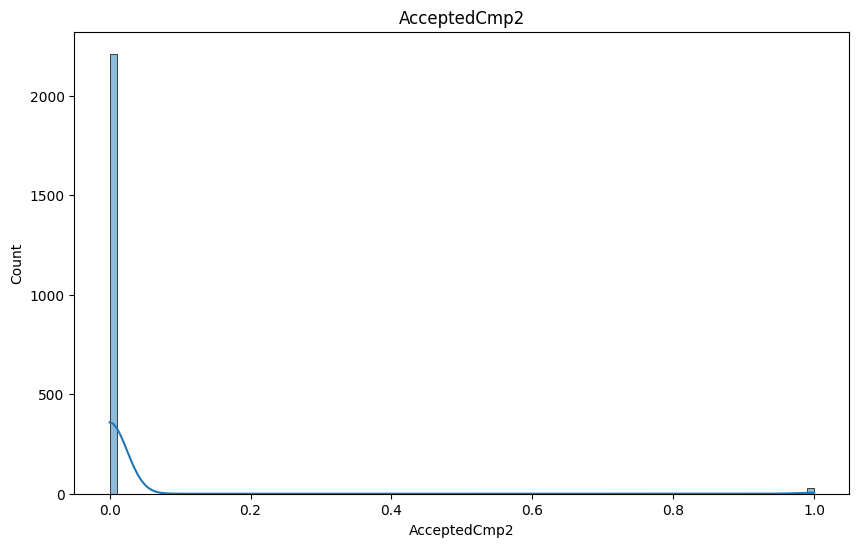

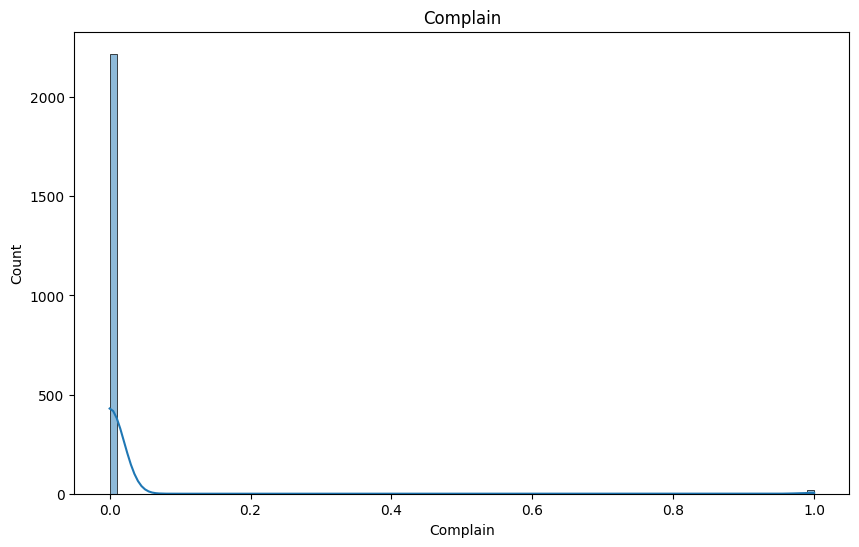

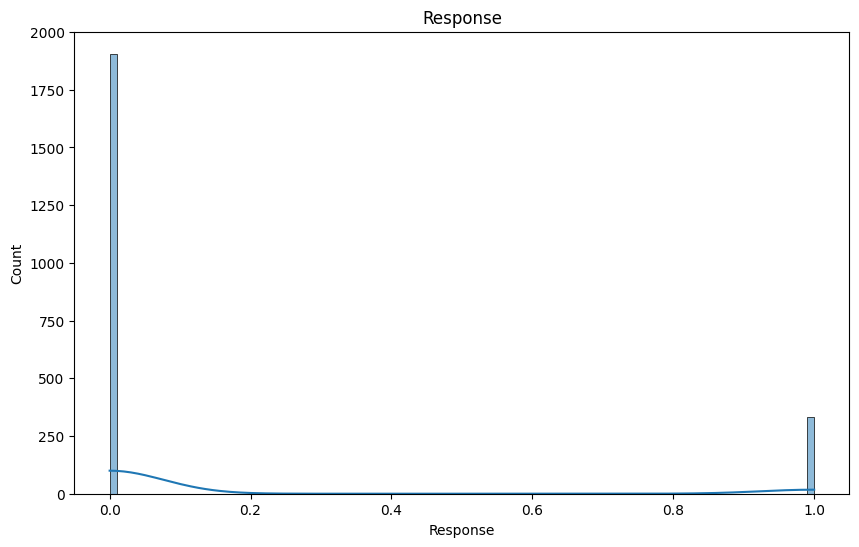

In [13]:
# Display hist plots for numerical features.
for col in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=100)   
    plt.title(f'{col}')
#     plt.xlabel('Average Monthly Hours')
#     plt.ylabel('Frequency')
plt.show()

## Visualization : Continuous target / Numerical features

In [14]:
#Numerical Features
numerical_features = data.select_dtypes(include = 'number').columns.values.tolist()

### Numerical features with LOW number of unique values


<span style="font-family:Comic Sans MS; color:red">If a numerical feature has a relatively low number of unique values, we can "see" it like a pseudo-categorical feature during visualization. </span>



In [15]:
# Max threshold for number of unique values within a column
max_unique = 3

# Numerical features with more than X unique values
numerical_features_small_uniques = []

for col in numerical_features:
    if len(data[col].unique()) < max_unique:
        numerical_features_small_uniques.append(col)
        
numerical_features_small_uniques

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

#### Barplot


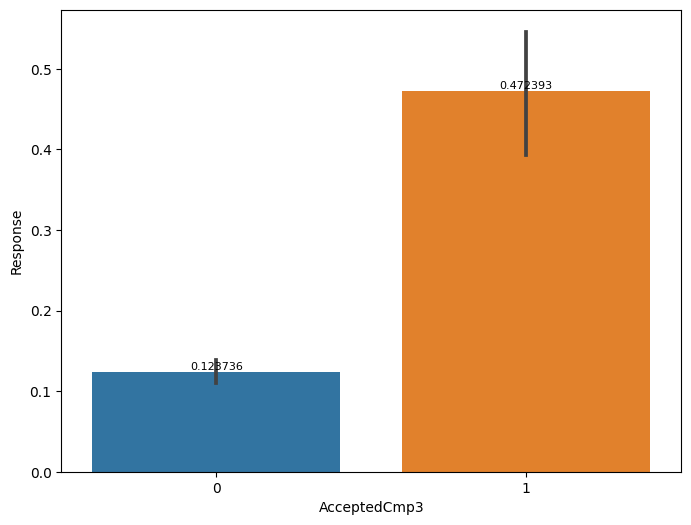

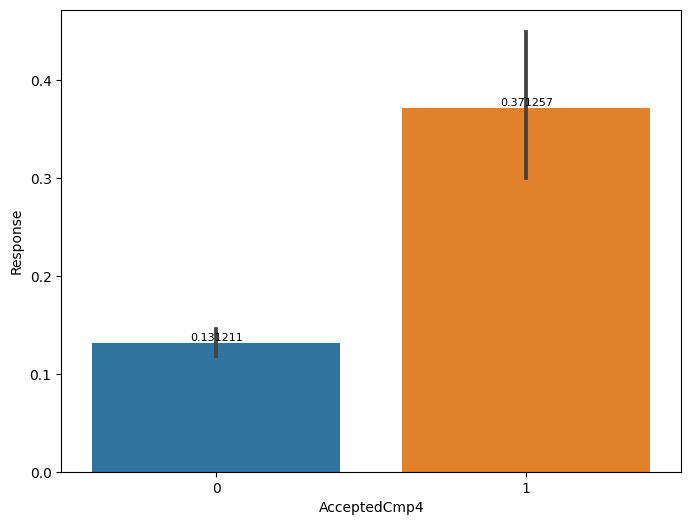

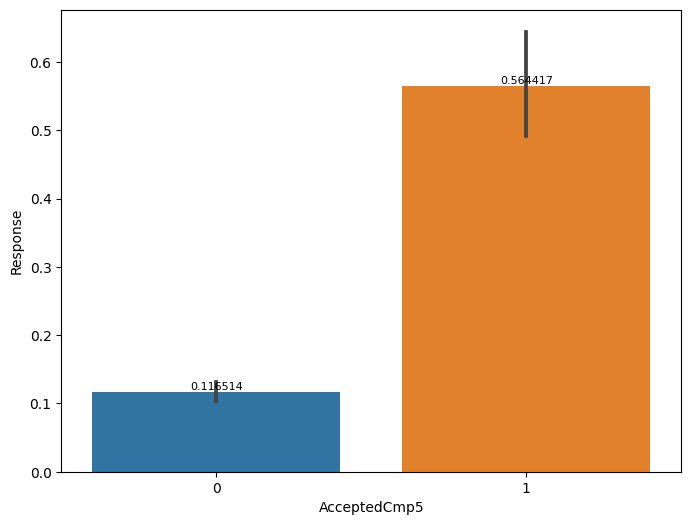

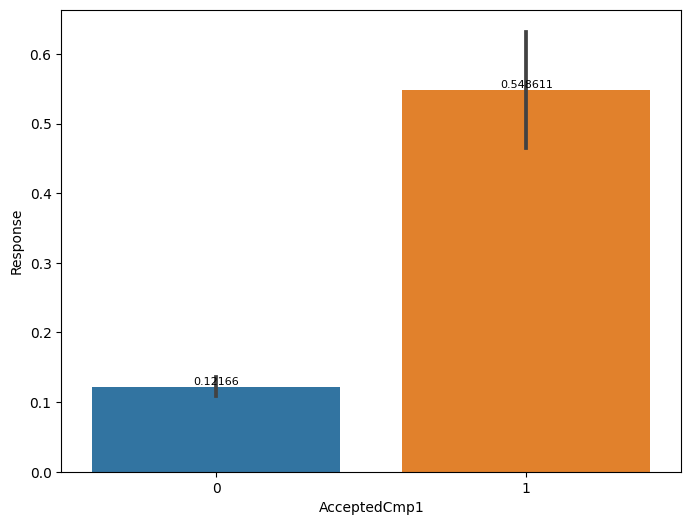

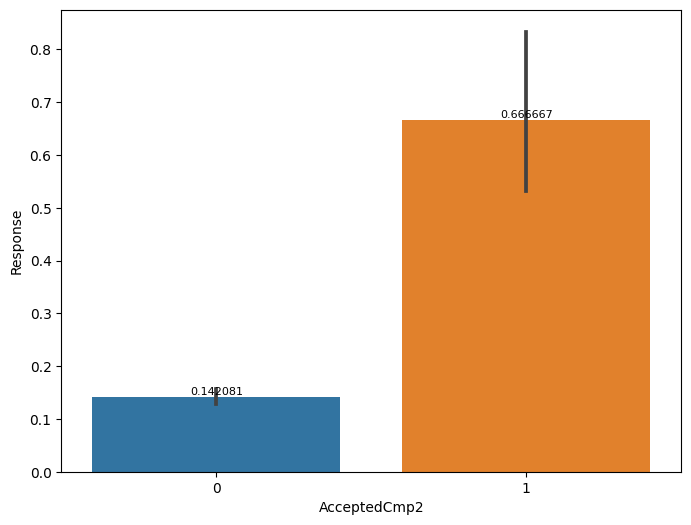

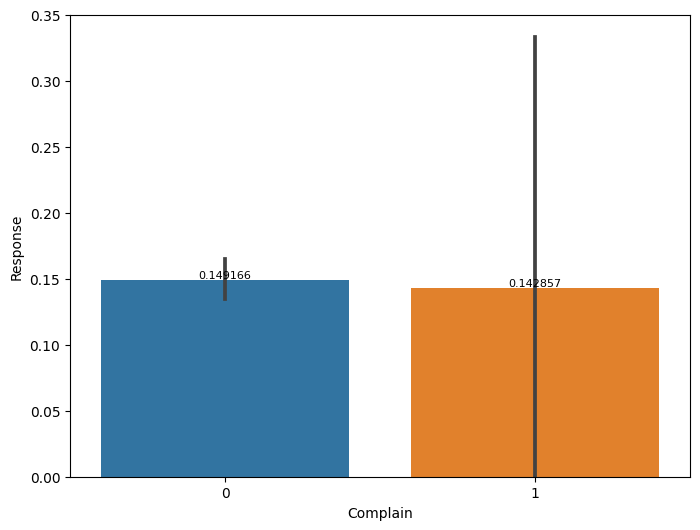

In [18]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    if col != target_name:        
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(data=data,
                        x=col,
                        y=target_name,)
    #                     ci = None,)       
        ax.bar_label(ax.containers[0], fontsize=8);          

#### Violin plots


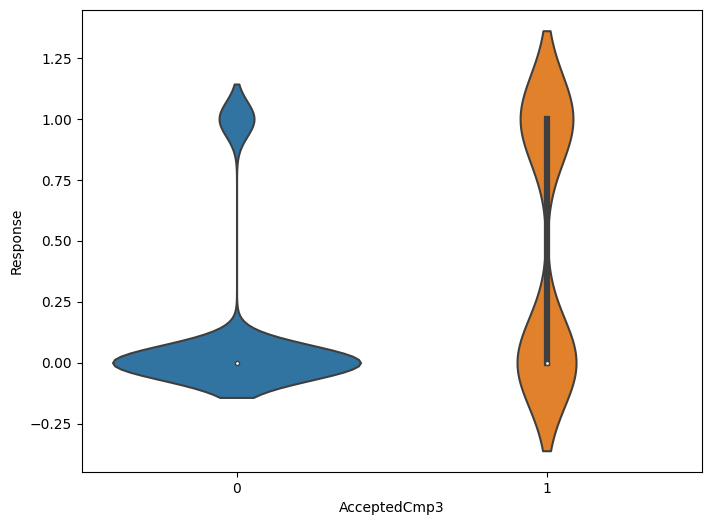

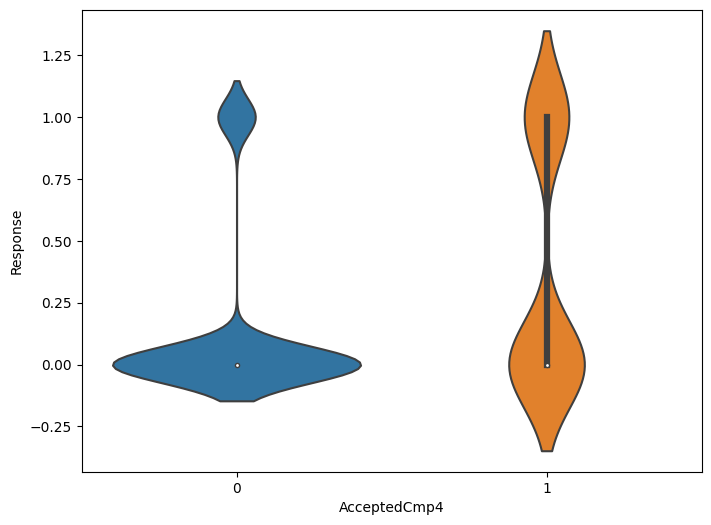

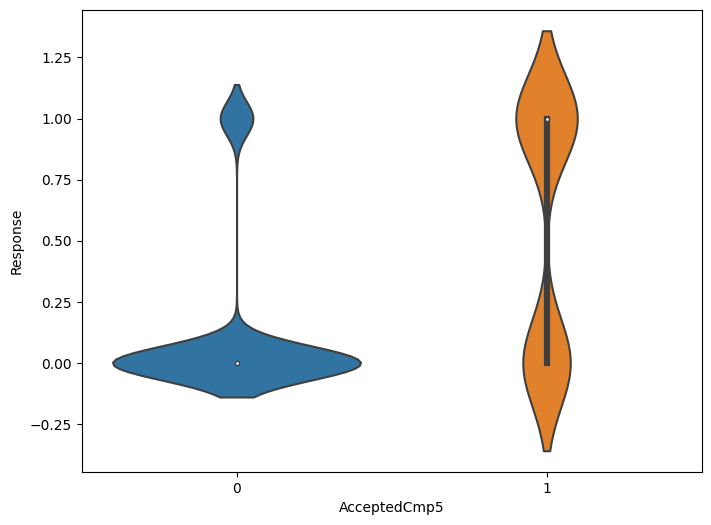

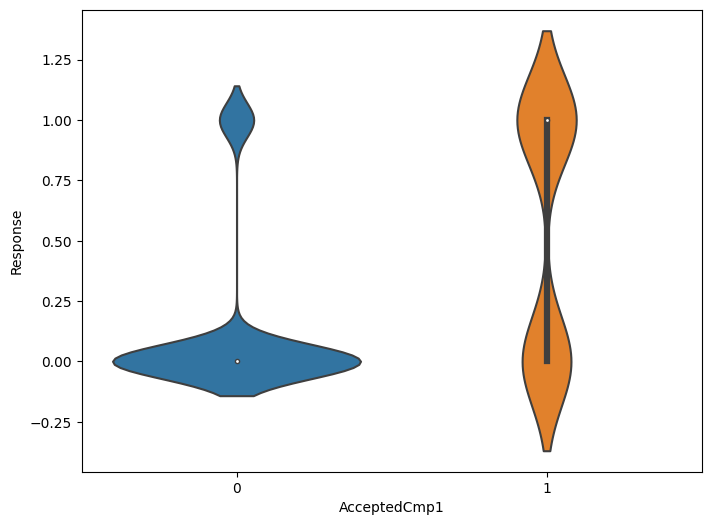

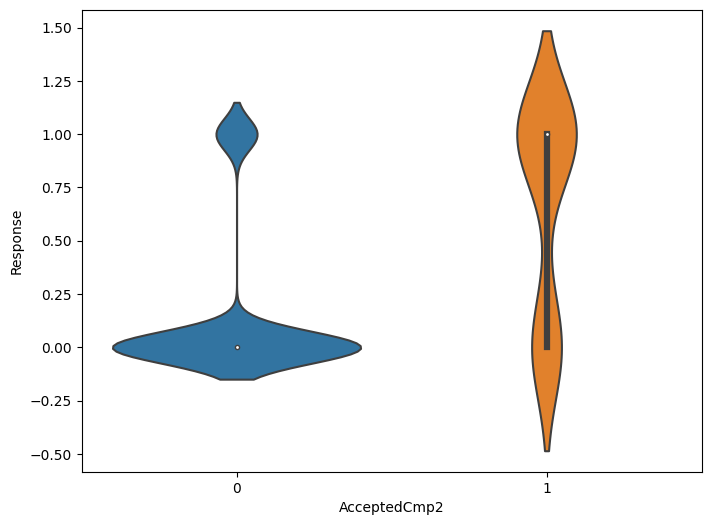

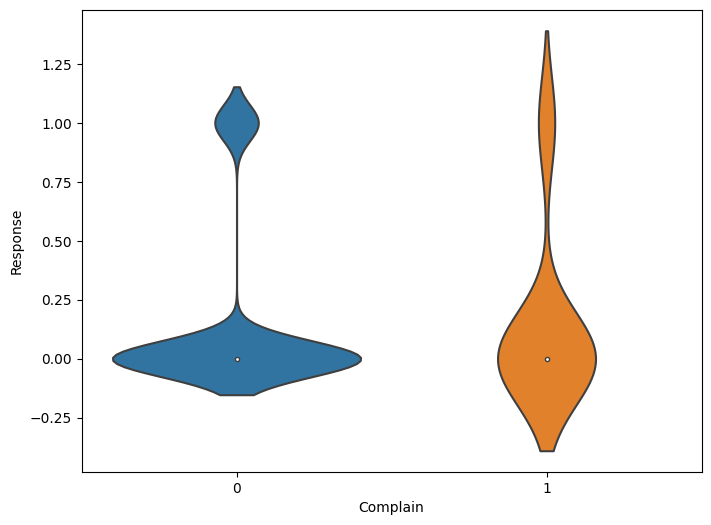

In [22]:
# Display violin plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    if col != target_name:        
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=col,
               y=target_name,        
               data=data)       

In [19]:
print i



SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (376644926.py, line 1)

#### Box plots

In [ ]:
# Display box plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set,
            x=col, 
            y=target_name)
    

In [ ]:
print i


##  Traint test split


In [ ]:
# Separating train set from test set
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# Display shapes
print(f"Shape of train_set : {train_set.shape}")
print(f"Shape of test_set : {test_set.shape}")

## Visualization : Continuous target / Numerical features

In [ ]:
#Numerical Features
numerical_features = train_set.select_dtypes(include = 'number').columns.values.tolist()


### Numerical features with LOW number of unique values


<span style="font-family:Comic Sans MS; color:red">If a numerical feature has a relatively low number of unique values, we can "see" it like a pseudo-categorical feature during visualization. </span>



In [ ]:
# Max threshold for number of unique values within a column
max_unique = 5

# Numerical features with more than X unique values
numerical_features_small_uniques = []

for col in numerical_features:
    if len(train_set[col].unique()) < max_unique:
        numerical_features_small_uniques.append(col)
numerical_features_small_uniques;

#### Barplot


In [ ]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None) 
    ax.bar_label(ax.containers[0], fontsize=8);
    

#### Violin plots


In [ ]:
# Display violin plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col,
           y=target_name,        
           data=train_set)
    

#### Box plots

In [ ]:
# Display box plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train_set,
            x=col, 
            y=target_name)
    

### Numerical features with HIGH number of unique values

In [ ]:
# Numerical features with more than X unique values
numerical_features_high_uniques = []

for col in numerical_features:
    if col not in numerical_features_small_uniques:
        numerical_features_high_uniques.append(col)
numerical_features_high_uniques;


#### Scatter plots


In [ ]:
# Display scatter plots for numerical features having a number of unique values greater than a max_threshold.
for col in numerical_features_high_uniques:   
    plt.figure(figsize=(8, 8))    
    sns.scatterplot(data=train_set,
                    x=col,
                    y=target_name)
    plt.grid(visible=None, which='major', axis='both')  

### Correlation between numerical features

#### Correlation heatmap

In [ ]:
# Heatmap of pairwise correlations
correlation_matrix = train_set.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


#### Correlation matrix 

In [ ]:
#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = train_set.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df


In [ ]:
#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(10)


#### Scatter matrix with high correlated features with the target value



In [ ]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats = 6

high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)


In [ ]:
# Display scatter matrix for numerical
scatter_matrix(train_set[high_corr_feats_list], figsize= (12,8))
plt.show()


## Visualization : Continuous target / Categorical features

In [ ]:
#Categorical Features
categorical_features = train_set.select_dtypes(exclude = 'number').columns.values.tolist()


### Bar plot

In [ ]:
# Display bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=train_set,
                    x=col,
                    y=target_name,
                    ci = None)
    ax.bar_label(ax.containers[0], fontsize=8);

<span style="font-family:Comic Sans MS; color:red">Plot a specific barplot. Insert column name below : </span>



In [ ]:
specific_column = 'Neighborhood'

In [ ]:
# Plot specific barplot
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=train_set,
                x=specific_column,
                y=target_name,
                ci = None)
ax.bar_label(ax.containers[0], fontsize=8);